In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent


('2017-08-23',)

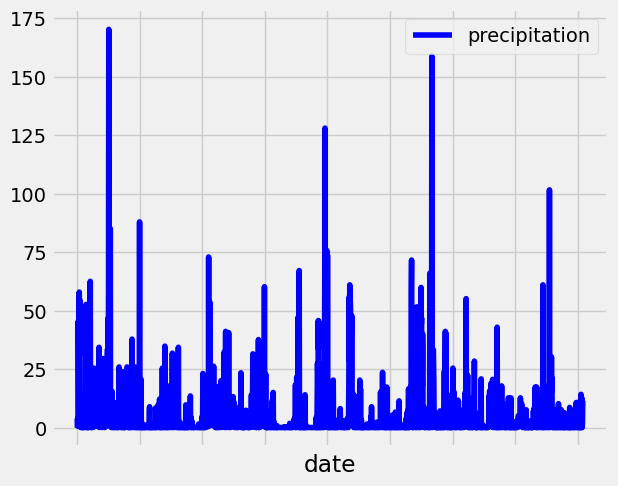

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
start=list(np.ravel(recent))[0]
latest=dt.datetime.strptime(start,"%Y-%m-%d")
year_back=latest-dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores
scores = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.asc()).\
filter(Measurement.date >= year_back).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
data_df = pd.DataFrame(scores)
data_df = data_df.rename(columns={'prcp': 'precipitation'})
# Sort the dataframe by date

data_df.sort_values(by=['date'])
data_df
data_df=data_df.dropna()
data_df=data_df.reset_index(drop=True)

# Use Pandas Plotting with Matplotlib to plot the data


plot = data_df.plot(color='b', legend=True)
plt.setp(plot.get_xticklabels(), visible=False)
plt.tight_layout()
plt.xlabel("date")
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
summ = data_df.describe()
summ

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.station).count()



9

In [14]:
#Using func count
session.query(func.count(Station.station)).all()

[(9,)]

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
join = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
join

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),\
                            func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
most_active

[(12.2, 29.4, 22.03582251082252)]

In [27]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
observation = session.query(Measurement.tobs).order_by(Measurement.tobs.asc()).\
filter(Measurement.date >= year_back).filter(Measurement.station == 'USC00519281').all()
observation

#frequency = observation.count()

[(15.0,),
 (15.0,),
 (15.0,),
 (15.6,),
 (15.6,),
 (16.1,),
 (16.7,),
 (16.7,),
 (16.7,),
 (16.7,),
 (16.7,),
 (16.7,),
 (17.2,),
 (17.2,),
 (17.2,),
 (17.2,),
 (17.8,),
 (17.8,),
 (17.8,),
 (18.3,),
 (18.3,),
 (18.3,),
 (18.3,),
 (18.3,),
 (18.3,),
 (18.3,),
 (18.9,),
 (18.9,),
 (18.9,),
 (18.9,),
 (18.9,),
 (19.4,),
 (19.4,),
 (19.4,),
 (19.4,),
 (19.4,),
 (19.4,),
 (19.4,),
 (19.4,),
 (19.4,),
 (19.4,),
 (19.4,),
 (19.4,),
 (19.4,),
 (19.4,),
 (19.4,),
 (20.0,),
 (20.0,),
 (20.0,),
 (20.0,),
 (20.0,),
 (20.0,),
 (20.0,),
 (20.0,),
 (20.0,),
 (20.0,),
 (20.0,),
 (20.0,),
 (20.6,),
 (20.6,),
 (20.6,),
 (20.6,),
 (20.6,),
 (20.6,),
 (20.6,),
 (20.6,),
 (20.6,),
 (20.6,),
 (20.6,),
 (20.6,),
 (20.6,),
 (20.6,),
 (20.6,),
 (20.6,),
 (20.6,),
 (20.6,),
 (20.6,),
 (21.1,),
 (21.1,),
 (21.1,),
 (21.1,),
 (21.1,),
 (21.1,),
 (21.1,),
 (21.1,),
 (21.1,),
 (21.1,),
 (21.1,),
 (21.1,),
 (21.1,),
 (21.1,),
 (21.1,),
 (21.1,),
 (21.1,),
 (21.1,),
 (21.1,),
 (21.1,),
 (21.1,),
 (21.1,),
 (21.7,),


In [28]:
temp_df = pd.DataFrame(observation)
temp_df

,tobs
0,15.0
1,15.0
2,15.0
3,15.6
4,15.6
...,...
347,27.2
348,27.8
349,27.8
350,27.8


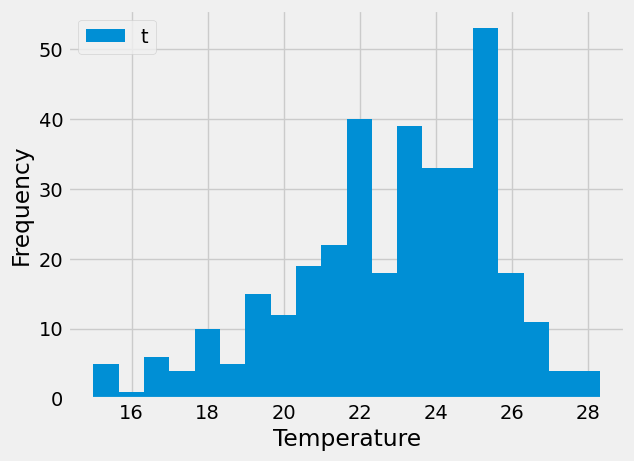

In [33]:
plt.hist(temp_df, bins=20)
plt.gca().set(xlabel= 'Temperature', ylabel='Frequency')
plt.legend('tobs', loc='upper left')

# Close Session

In [34]:
# Close Session
session.close()